<a href="https://colab.research.google.com/gist/siddharth-ncl-work/335eb34d16f7fe0246d9956f5f93f385/calculate_motif_frequencies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calculation of Motif Frequencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import re

from Bio import motifs
from Bio.Seq import Seq

In [ ]:
!pip install biopython

## Download Data

In [ ]:
!wget https://raw.githubusercontent.com/NarlikarLab/cisDIVERSITY/master/example.fa

--2021-02-13 05:02:48--  https://raw.githubusercontent.com/NarlikarLab/cisDIVERSITY/master/example.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215890 (211K) [text/plain]
Saving to: ‘example.fa.2’

example.fa.2        100%[===================>] 210.83K  --.-KB/s    in 0.03s   

2021-02-13 05:02:48 (6.83 MB/s) - ‘example.fa.2’ saved [215890/215890]



## Data Processing

In [ ]:
_data={'seq_no.':[],'seq':[],'module':[]}
for line in open('example.fa','r').readlines():
  if '>' in line[0]:
    id=line.split('_')[0].split(':')[1]
    _data['seq_no.'].append(id)
    module=int(line.split('_')[1].split(':')[1])
    _data['module'].append(module)
  else:
    _data['seq'].append(line)
data=pd.DataFrame.from_dict(_data)
print(f'Dataset Size = {data.shape[0]}')
data.head()

Dataset Size = 1000


,seq_no.,seq,module
0,0,GGAGGAGGAAGAGGCTGGGCCCCTGCTGTGTGGGGGCAAGTTCCCA...,0
1,1,CAAATACCCTGGGGTGCAATACGACTTATATCTCACGTATTGGAAG...,1
2,2,AACTAGGACACAGAAGTTGATCTAACGTAAACATCAAGAGCTTCCT...,1
3,3,CACAGCTGGGCCTGGTTGGTCTTTGTCCAGGGAACAATGGAGCGCC...,1
4,4,TTGTTTTATTTGTTTGTTGGGGGGCGGCGGGGAGCGACAGGGGAGT...,0


## Number of Squences in 3 Modules (in %)

In [ ]:
data['module'].value_counts(normalize=True)*100

0    48.0
1    47.8
2     4.2
Name: module, dtype: float64

## Download 5 Motifs Used in the Paper

In [ ]:
!wget http://jaspar.genereg.net/api/v1/matrix/MA0030.1.pfm
!wget http://jaspar.genereg.net/api/v1/matrix/MA0520.1.pfm
!wget http://jaspar.genereg.net/api/v1/matrix/MA0009.2.pfm
!wget http://jaspar.genereg.net/api/v1/matrix/MA0019.1.pfm
!wget http://jaspar.genereg.net/api/v1/matrix/MA1112.1.pfm

--2021-02-13 05:02:48--  http://jaspar.genereg.net/api/v1/matrix/MA0030.1.pfm
Resolving jaspar.genereg.net (jaspar.genereg.net)... 193.60.222.202
Connecting to jaspar.genereg.net (jaspar.genereg.net)|193.60.222.202|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408 [text/pfm]
Saving to: ‘MA0030.1.pfm.2’

MA0030.1.pfm.2      100%[===================>]     408  --.-KB/s    in 0s      

2021-02-13 05:02:48 (52.0 MB/s) - ‘MA0030.1.pfm.2’ saved [408/408]

--2021-02-13 05:02:48--  http://jaspar.genereg.net/api/v1/matrix/MA0520.1.pfm
Resolving jaspar.genereg.net (jaspar.genereg.net)... 193.60.222.202
Connecting to jaspar.genereg.net (jaspar.genereg.net)|193.60.222.202|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444 [text/pfm]
Saving to: ‘MA0520.1.pfm.2’

MA0520.1.pfm.2      100%[===================>]     444  --.-KB/s    in 0s      

2021-02-13 05:02:49 (67.6 MB/s) - ‘MA0520.1.pfm.2’ saved [444/444]

--2021-02-13 05:02:49--  http://jaspar

## Visualize Motifs

In [ ]:
m1=motifs.read(open("MA0030.1.pfm"), "jaspar")
m2=motifs.read(open("MA0520.1.pfm"), "jaspar")
m3=motifs.read(open("MA0009.2.pfm"), "jaspar")
m4=motifs.read(open("MA0019.1.pfm"), "jaspar")
m5=motifs.read(open("MA1112.1.pfm"), "jaspar")

        0      1      2      3      4      5      6      7      8      9     10     11     12     13
A:   0.04   0.37   0.63   0.46   0.14   0.26   0.00   1.00   1.00   1.00   0.00   1.00   0.59   0.26
C:   0.37   0.26   0.15   0.18   0.50   0.00   0.00   0.00   0.00   0.00   0.93   0.00   0.15   0.15
G:   0.26   0.19   0.07   0.18   0.36   0.74   0.00   0.00   0.00   0.00   0.00   0.00   0.07   0.22
T:   0.33   0.19   0.15   0.18   0.00   0.00   1.00   0.00   0.00   0.00   0.07   0.00   0.19   0.37



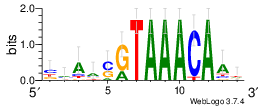

In [ ]:
m1.weblogo('m1.jpg',color_scheme='color_classic')
image = Image.open('m1.jpg')
print(m1.pwm)
image

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14
A:   0.14   0.36   0.08   0.00   0.01   0.07   0.04   0.36   0.18   0.62   0.01   1.00   1.00   0.34   0.19
C:   0.36   0.18   0.31   0.00   0.00   0.91   0.65   0.01   0.29   0.00   0.00   0.00   0.00   0.29   0.26
G:   0.26   0.20   0.24   0.00   0.00   0.00   0.00   0.12   0.48   0.22   0.97   0.00   0.00   0.21   0.13
T:   0.24   0.26   0.38   1.00   0.99   0.03   0.31   0.51   0.05   0.15   0.02   0.00   0.00   0.16   0.42



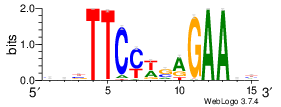

In [ ]:
m2.weblogo('m2.jpg',color_scheme='color_classic')
image = Image.open('m2.jpg')
print(m2.pwm)
image

        0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15
A:   0.01   0.26   0.69   0.00   0.97   0.04   0.25   0.08   0.80   0.09   0.08   0.00   0.00   0.06   0.04   0.97
C:   0.02   0.56   0.01   1.00   0.00   0.88   0.48   0.08   0.02   0.17   0.02   0.03   0.00   0.26   0.12   0.00
G:   0.00   0.15   0.26   0.00   0.03   0.02   0.18   0.03   0.09   0.49   0.86   0.00   1.00   0.01   0.68   0.03
T:   0.97   0.03   0.04   0.00   0.00   0.07   0.09   0.82   0.08   0.25   0.04   0.97   0.00   0.67   0.16   0.00



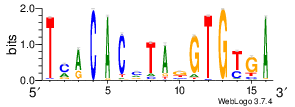

In [ ]:
m3.weblogo('m3.jpg',color_scheme='color_classic')
image = Image.open('m3.jpg')
print(m3.pwm)
image

        0      1      2      3      4      5      6      7      8      9     10     11
A:   0.36   0.28   0.46   0.00   0.00   0.10   0.97   0.92   0.00   0.36   0.10   0.00
C:   0.18   0.18   0.08   0.03   0.00   0.85   0.03   0.05   0.15   0.44   0.59   0.67
G:   0.31   0.36   0.38   0.00   0.97   0.00   0.00   0.03   0.00   0.13   0.23   0.15
T:   0.15   0.18   0.08   0.97   0.03   0.05   0.00   0.00   0.85   0.08   0.08   0.18



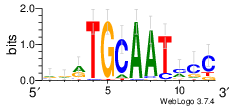

In [ ]:
m4.weblogo('m4.jpg',color_scheme='color_classic')
image = Image.open('m4.jpg')
print(m4.pwm)
image

        0      1      2      3      4      5      6      7      8      9
A:   0.29   0.68   0.98   0.97   0.00   0.00   0.00   0.01   0.76   0.24
C:   0.21   0.05   0.00   0.02   0.02   0.00   0.00   0.99   0.05   0.28
G:   0.21   0.15   0.01   0.00   0.96   0.99   0.00   0.00   0.10   0.24
T:   0.28   0.12   0.01   0.01   0.02   0.00   0.99   0.00   0.08   0.24



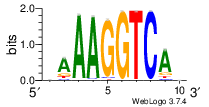

In [ ]:
m5.weblogo('m5.jpg',color_scheme='color_classic')
image = Image.open('m5.jpg')
print(m5.pwm)
image

## Generate Regular Expression for All 5 Motifs

In [ ]:
def extractPattern(row):
  tol=7e-2
  pattern=[]
  for b in 'ACGT':
    if row[b]>tol:
      pattern.append(b)
  if len(pattern)>1 and len(pattern)<4:
    return f"[{'|'.join(pattern)}]"
  elif len(pattern)==1:
    return pattern[0]
  elif len(pattern)==4:
    return '.'
  elif len(pattern)==0:
    return ' '

m=m1
m_df=pd.DataFrame.from_dict(m.pwm)
m_df['pattern']=m_df.apply(extractPattern,axis=1)
m1_pattern=''.join(m_df['pattern'].values)
print(m1_pattern)

m=m2
m_df=pd.DataFrame.from_dict(m.pwm)
m_df['pattern']=m_df.apply(extractPattern,axis=1)
m2_pattern=''.join(m_df['pattern'].values)
print(m2_pattern)

m=m3
m_df=pd.DataFrame.from_dict(m.pwm)
m_df['pattern']=m_df.apply(extractPattern,axis=1)
m3_pattern=''.join(m_df['pattern'].values)
print(m3_pattern)

m=m4
m_df=pd.DataFrame.from_dict(m.pwm)
m_df['pattern']=m_df.apply(extractPattern,axis=1)
m4_pattern=''.join(m_df['pattern'].values)
print(m4_pattern)

m=m5
m_df=pd.DataFrame.from_dict(m.pwm)
m_df['pattern']=m_df.apply(extractPattern,axis=1)
m5_pattern=''.join(m_df['pattern'].values)
print(m5_pattern)

[C|G|T]...[A|C|G][A|G]TAAA[C|T]A..
...TTC[C|T][A|G|T][A|C|G][A|G|T]GAA..
T[A|C|G][A|G]CAC.[A|C|T][A|G|T].[A|G]TG[C|T][C|G|T]A
...TG[A|C]AA[C|T]..[C|G|T]
.[A|G|T]AAGGTC[A|G|T].


## 1. Frequencies (in %) of Motifs in Each Module (using regular expression)

In [ ]:
def motifPatternCount(seq):
  count=re.findall(motif_pattern,seq,)
  return 1 if len(count)>0 else 0

In [ ]:
motif_pattern=m1_pattern
data['m1']=data['seq'].apply(motifPatternCount)
motif_pattern=m2_pattern
data['m2']=data['seq'].apply(motifPatternCount)
motif_pattern=m3_pattern
data['m3']=data['seq'].apply(motifPatternCount)
motif_pattern=m4_pattern
data['m4']=data['seq'].apply(motifPatternCount)
motif_pattern=m5_pattern
data['m5']=data['seq'].apply(motifPatternCount)

In [ ]:
gb=data.groupby(['module']).sum()
module_count=data['module'].value_counts()
for idx,count in enumerate(module_count):
  gb.iloc[idx]/=count
print('--> Motif Frequencies using regular expression:\n')
(gb*100).apply(np.floor)

--> Motif Frequencies using regular expression:



,m1,m2,m3,m4,m5
module,,,,,
0,16.0,49.0,59.0,15.0,2.0
1,47.0,2.0,0.0,42.0,1.0
2,2.0,54.0,0.0,14.0,38.0


## 2. Frequencies (in %) of Motifs in Every Module (using biopython library)

In [ ]:
def motifCount(seq):
  count=0
  for pos,_ in motif.pssm.search(Seq(seq), threshold=8.5):
    if pos>=0:
      count+=1
  return 1 if count>0 else 0

In [ ]:
motif=m1
data['m1']=data['seq'].apply(motifCount)
motif=m2
data['m2']=data['seq'].apply(motifCount)
motif=m3
data['m3']=data['seq'].apply(motifCount)
motif=m4
data['m4']=data['seq'].apply(motifCount)
motif=m5
data['m5']=data['seq'].apply(motifCount)

In [ ]:
gb=data.groupby(['module']).sum()
module_count=data['module'].value_counts()
for idx,count in enumerate(module_count):
  gb.iloc[idx]/=count
print('--> Motif Frequencies using biopython library:\n')
(gb*100).apply(np.floor)

--> Motif Frequencies using biopython library:



,m1,m2,m3,m4,m5
module,,,,,
0,14.0,72.0,98.0,5.0,5.0
1,49.0,9.0,1.0,35.0,3.0
2,2.0,78.0,2.0,4.0,42.0
